In [1]:
# importing libraries
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Data
Ellaborate information about the dataset can be found [here](https://github.com/AmoghJohri/TVB-Tests/blob/master/REPORT.md). <br>
For our comparision we utilize the `PCorr.txt` file associated with participant. This stores the Pearsons' Correlation Value for the Empirical FC matrix vs Simulated FC matrix (for a range of *G - Global Coupling* values.

In [3]:
# subjects under analysis
subjects = os.listdir("./Output_filtered/")
print("Control Group Subjects: ")
for each in subjects:
    if "CON" in each:
        print(each, end = " ")
print("\n\nPatients: ")
for each in subjects:
    if "PAT" in each:
        print(each, end = " ")
print("\n\nTotal Number Of Participants Under Analysis: ", len(subjects))

Control Group Subjects: 
CON06 CON10 CON01 CON02 CON05 CON03 CON11 CON08 CON09 CON04 CON07 

Patients: 
PAT10 PAT19 PAT20 PAT23 PAT01 PAT11 PAT02 PAT06 PAT25 PAT05 PAT03 PAT22 PAT15 PAT17 PAT07 PAT16 PAT14 PAT13 PAT24 PAT08 

Total Number Of Participants Under Analysis:  31


In [6]:
# to get the path for the required result directory
def get_path(estimation, subject):
    return "./Output_filtered/" + subject + "/Output_" + estimation + "/"

In [7]:
# range of values of G over which the parameter-space exploration was performed
G = sorted([(i/10) + 0.01 for i in range(0, 32, 2)], reverse=True)
for each in G:
    print(str(each)[:4], end= " ")

3.01 2.80 2.61 2.40 2.21 2.01 1.81 1.61 1.41 1.21 1.01 0.81 0.61 0.41 0.21 0.01 

### Single Subject Demonstration
Here, we have shown how the correlation values of neural simulations behave with respect to the deconvolved BOLD simulations (for a single subject)

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


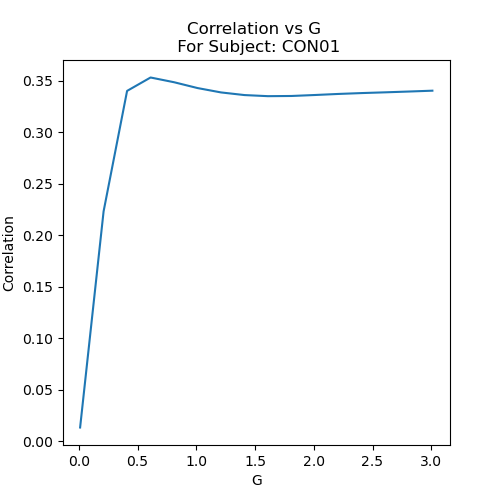

In [8]:
# getting the correlation vs G plot for a single subject
%pylab nbagg
plt.rcParams['figure.figsize'] = [5, 5]
temp = np.loadtxt(get_path("neuralResponseCanon2dd", "CON01")+"PCorr.txt",delimiter="\n")
plt.plot(G, temp)
plt.xlabel("G")
plt.ylabel("Correlation")
plt.title("Correlation vs G \n For Subject: CON01")
plt.show()

### Analysis
For the comparision, the BOLD simulation (as convolved through the canon2dd estimation), and the neural-response correlations (as decovolved using the canon2dd estimation) has been used.

In [12]:
# getting the max for each estimation stratergy
CON      = [] # control group patricipants
PAT      = [] # patients
# max-correlation values for each estimation strategy
# arr[0] corresponds to Control group participants (CON)
# arr[1] corresponds to Patient group participants (PAT)
CANON          = [[], []]
NEURAL_CANON   = [[], []]
NEURAL_GAMMA   = [[], []]
for each in subjects:
    if "CON" in each:
        CANON[0].append(np.max(np.loadtxt(get_path("canon2dd", each)+"PCorr.txt",delimiter="\n")))
        NEURAL_CANON[0].append(np.max(np.loadtxt(get_path("neuralResponseCanon2dd", each)+"PCorr.txt",delimiter="\n")))
        NEURAL_GAMMA[0].append(np.max(np.loadtxt(get_path("neuralResponseGamma", each)+"PCorr.txt",delimiter="\n")))
        CON.append(each)
    elif "PAT" in each:
        CANON[1].append(np.max(np.loadtxt(get_path("canon2dd", each)+"PCorr.txt",delimiter="\n")))
        NEURAL_CANON[1].append(np.max(np.loadtxt(get_path("neuralResponseCanon2dd", each)+"PCorr.txt",delimiter="\n")))
        NEURAL_GAMMA[1].append(np.max(np.loadtxt(get_path("neuralResponseGamma", each)+"PCorr.txt",delimiter="\n")))
        PAT.append(each)

In [13]:
# converting to numpy arrays
for i in range(0, 2):
    CANON[i]   = np.array(CANON[i])
    NEURAL_CANON[i]  = np.array(NEURAL_CANON[i])
    NEURAL_GAMMA[i]  = np.array(NEURAL_GAMMA[i])
CON     = np.array(CON)
PAT     = np.array(PAT)
CANON   = np.array(CANON)
NEURAL_CANON  = np.array(NEURAL_CANON)
NEURAL_GAMMA  = np.array(NEURAL_GAMMA)

In [14]:
# sorting the correlation values
indsCON = CANON[0].argsort()
sortedCanonCON = CANON[0][indsCON[::]]
sortedNeuralCanonCON = NEURAL_CANON[0][indsCON[::]]
sortedNeuralGammaCON = NEURAL_GAMMA[0][indsCON[::]]

In [15]:
# getting average correlation
neural_canon = np.concatenate((NEURAL_CANON[0], NEURAL_CANON[1]))
neural_gamma = np.concatenate((NEURAL_GAMMA[0], NEURAL_GAMMA[1]))
canon = []
for i in range(len(CANON[0])):
    canon.append([np.max([CANON[0][i]])])
for i in range(len(CANON[1])):
    canon.append([np.max([CANON[1][i]])])
canon = np.array(canon).reshape(-1)
print("Average Correlation Values: \n")
print("Across All Participants")
print("Neural_canon: ", sum(neural_canon)/len(neural_canon))
print("Neural_gamma: ", sum(neural_gamma)/len(neural_gamma))
print("Canon: ", sum(canon)/len(canon))
print("\nAcross Control Subjects")
print("Neural_canon: ", sum(neural_canon[:11])/len(neural_canon[:11]))
print("Neural_gamma: ", sum(neural_gamma[:11])/len(neural_gamma[:11]))
print("Canon: ", sum(canon[:11])/len(canon[:11]))
print("\nAcross Patients")
print("Neural_canon: ", sum(neural_canon[11:])/len(neural_canon[11:]))
print("Neural_gamma: ", sum(neural_gamma[11:])/len(neural_gamma[11:]))
print("Canon: ", sum(canon[11:])/len(canon[11:]))

Average Correlation Values: 

Across All Participants
Neural_canon:  0.26173088240564524
Neural_gamma:  0.2620030953272086
Canon:  0.30316595660878176

Across Control Subjects
Neural_canon:  0.24946119098043476
Neural_gamma:  0.25536704591366716
Canon:  0.2843838768529511

Across Patients
Neural_canon:  0.2684792126895109
Neural_gamma:  0.26565292250465644
Canon:  0.3134961004744887


The above values show that the convolution method provides ~0.045 increase (on average) in the correlation of empirical FC vs simulated FC.

### Comparitive Analysis
In the next sections we will show the comparision between the correlation values of convolution vs without-convolution.

In [19]:
# sorting the correlation values
indsCanon = canon.argsort()
sortedNeuralCanon = neural_canon[indsCanon]
sortedNeuralGamma = neural_gamma[indsCanon]
sortedCanon = canon[indsCanon]

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


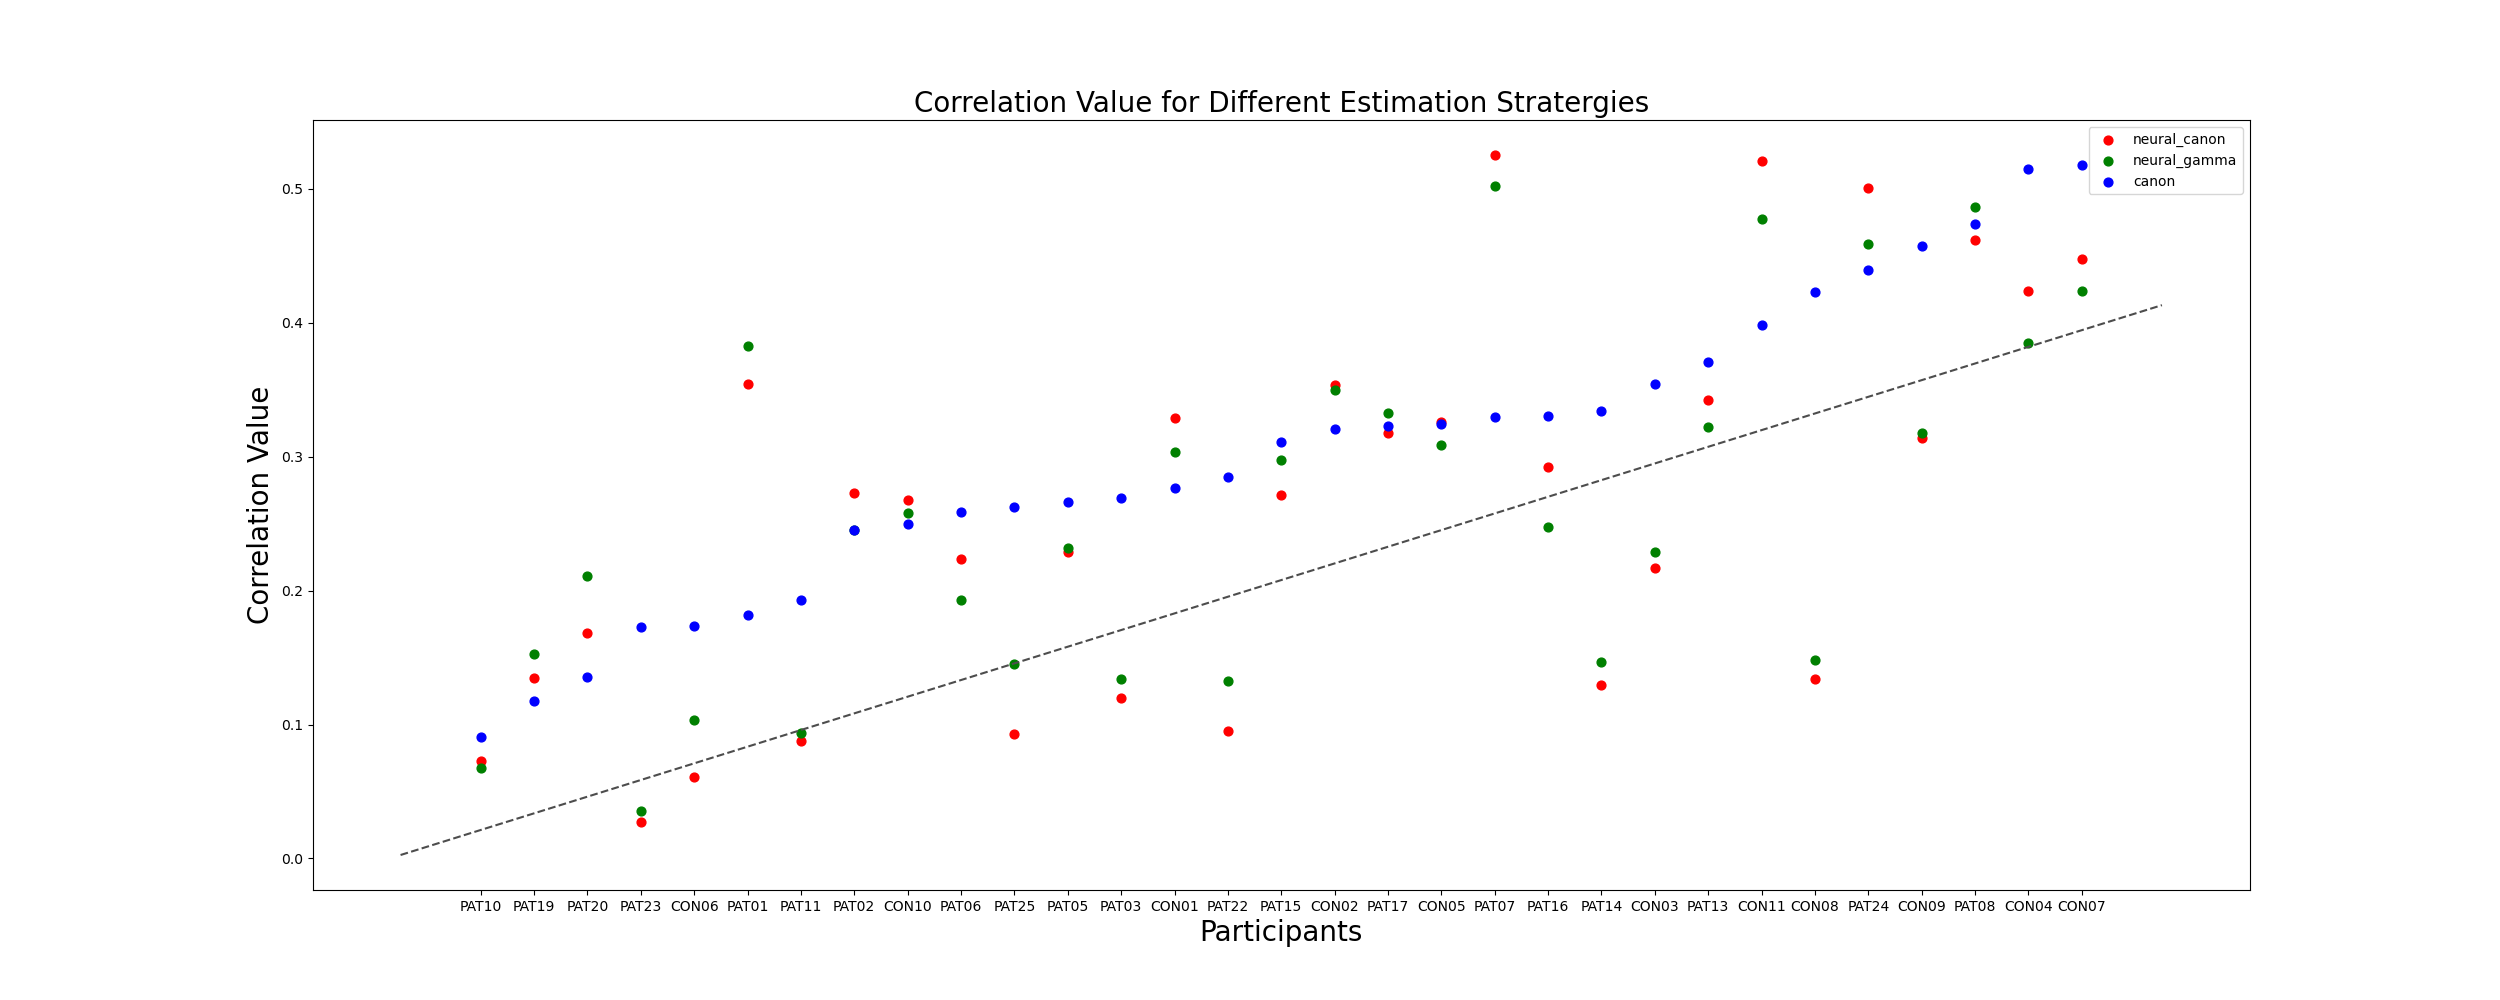

In [20]:
%pylab nbagg
plt.rcParams['figure.figsize'] = [25, 10]
plt.scatter(subjects, sortedNeuralCanon, label="neural_canon", color="red", s=40)
plt.scatter(subjects, sortedNeuralGamma, label="neural_gamma", color="green", s=40)
plt.scatter(subjects, sortedCanon, label="canon", color="blue", s=40)
ylim = [0, 0]
ylim[0] = plt.gca().get_ylim()[0]
ylim[1] = plt.gca().get_ylim()[1] - 0.137
plt.plot(plt.gca().get_xlim(), ylim, ls="--", c=".3")
plt.xlabel("Participants", size=20)
plt.ylabel("Correlation Value", size=20)
plt.title("Correlation Value for Different Estimation Stratergies", size=20)
plt.legend(prop={'size': 10})
plt.show()

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


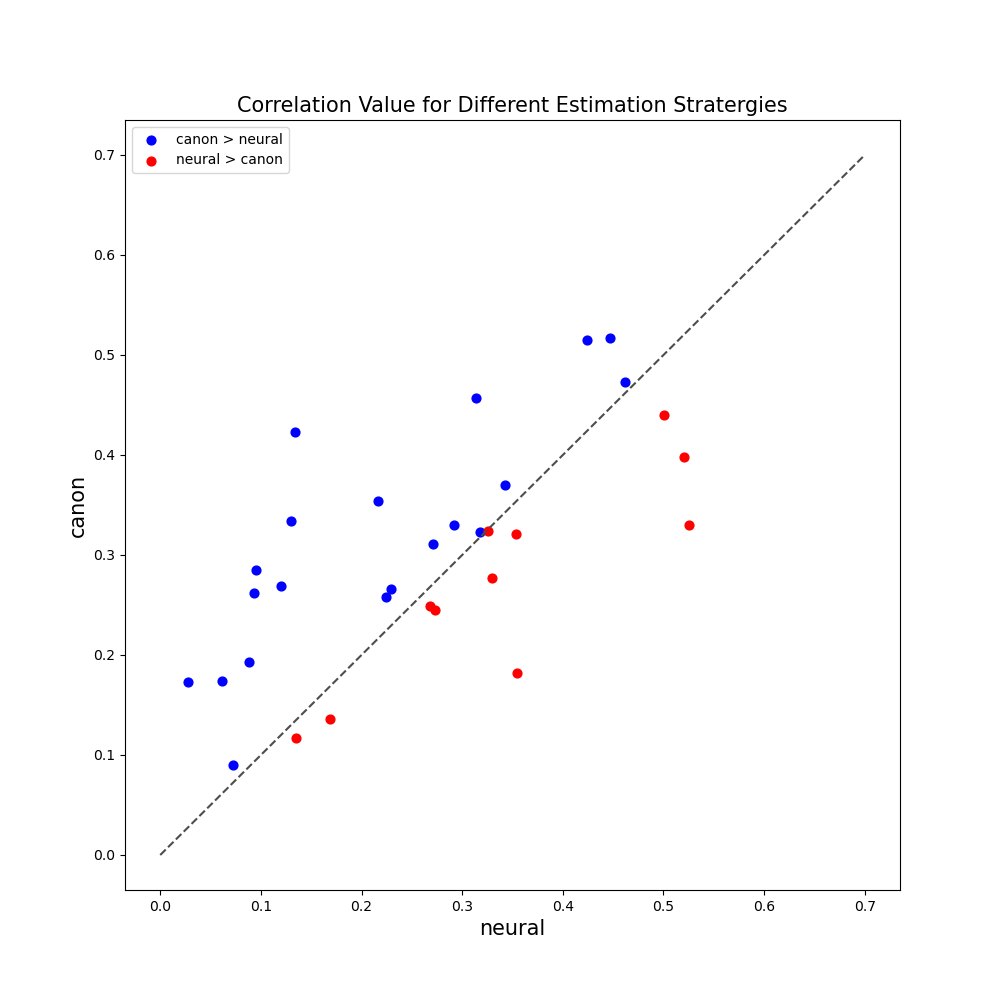

In [24]:
%pylab nbagg
plt.rcParams['figure.figsize'] = [10, 10]
temp1 = [[], []]
temp2 = [[], []]
for i in range(len(sortedNeuralCanon)):
    if sortedNeuralCanon[i] > sortedCanon[i]:
        temp2[0].append(sortedCanon[i])
        temp2[1].append(sortedNeuralCanon[i])
    else:
        temp1[0].append(sortedCanon[i])
        temp1[1].append(sortedNeuralCanon[i])
plt.scatter(temp1[1], temp1[0], color="blue", label="canon > neural", s=40)
plt.scatter(temp2[1], temp2[0], color="red", label="neural > canon", s=40)
xlim = (0.0, 0.7)
ylim = (0.0, 0.7)
plt.plot(xlim, ylim, ls="--", c=".3")
plt.xlabel("neural", size=15)
plt.ylabel("canon", size=15)
plt.title("Correlation Value for Different Estimation Stratergies", size=15)
plt.legend()
plt.show()

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


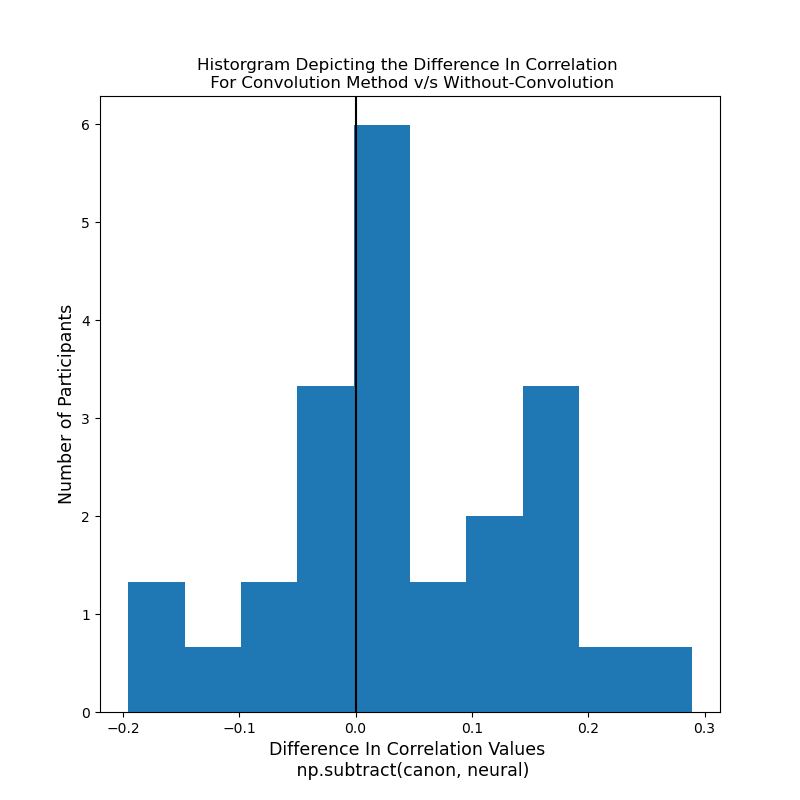

In [25]:
%pylab nbagg
plt.rcParams['figure.figsize'] = [8, 8]
diff = np.subtract(canon, neural_canon)
plt.hist(diff, bins=10, density=True)
plt.axvline(x=0, ymin=0.0, ymax=9, color="black")
plt.xlabel("Difference In Correlation Values \n np.subtract(canon, neural)", size=12.5)
plt.ylabel("Number of Participants", size=12.5)
plt.title("Historgram Depicting the Difference In Correlation \n For Convolution Method v/s Without-Convolution")
plt.show()